# Stat-517 Project-2


## Ques-0 : Predicting Job Salary 

A project for Data Mining at the University of Southampton. The aim is to predict a job's salary with statistical learning, based on information within a job advert.

The main dataset consists of roughly 250k rows representing individual job ads, and a set of variables descriptions about each job ad. A simplified data of 10k could be retrieved at

In [3]:
import pandas as pd

sal = pd.read_csv("http://www.webpages.uidaho.edu/~stevel/Datasets/salary_uk.csv")
sal


,Id,Title,FullDescription,LocationRaw,LocationNormalized,ContractType,ContractTime,Company,Category,SalaryRaw,SalaryNormalized,SourceName
0,12612628,Engineering Systems Analyst,Engineering Systems Analyst Dorking Surrey Sal...,"Dorking, Surrey, Surrey",Dorking,NaN,permanent,Gregory Martin International,Engineering Jobs,20000 - 30000/annum 20-30K,25000,cv-library.co.uk
1,12612830,Stress Engineer Glasgow,Stress Engineer Glasgow Salary **** to **** We...,"Glasgow, Scotland, Scotland",Glasgow,NaN,permanent,Gregory Martin International,Engineering Jobs,25000 - 35000/annum 25-35K,30000,cv-library.co.uk
2,12612844,Modelling and simulation analyst,Mathematical Modeller / Simulation Analyst / O...,"Hampshire, South East, South East",Hampshire,NaN,permanent,Gregory Martin International,Engineering Jobs,20000 - 40000/annum 20-40K,30000,cv-library.co.uk
3,12613049,Engineering Systems Analyst / Mathematical Mod...,Engineering Systems Analyst / Mathematical Mod...,"Surrey, South East, South East",Surrey,NaN,permanent,Gregory Martin International,Engineering Jobs,25000 - 30000/annum 25K-30K negotiable,27500,cv-library.co.uk
4,12613647,"Pioneer, Miser Engineering Systems Analyst","Pioneer, Miser Engineering Systems Analyst Do...","Surrey, South East, South East",Surrey,NaN,permanent,Gregory Martin International,Engineering Jobs,20000 - 30000/annum 20-30K,25000,cv-library.co.uk
5,13179816,Engineering Systems Analyst Water Industry,Engineering Systems Analyst Water Industry Loc...,"Dorking, Surrey, Surrey, Surrey",Dorking,NaN,permanent,Gregory Martin International,Engineering Jobs,20000 - 30000/annum 20K to 30K,25000,cv-library.co.uk
6,14131336,Senior Subsea Pipeline Integrity Engineer,A globally renowned engineering and training c...,"Aberdeen, Borders",UK,NaN,permanent,Indigo 21 Ltd,Engineering Jobs,50000 - 100000/annum,75000,cv-library.co.uk
7,14663196,RECRUITMENT CONSULTANT INDUSTRIAL / COMMERCIA...,THIS IS A LIVE VACANCY NOT A GENERIC ADVERTISE...,"MANCHESTER, Greater Manchester",Manchester,NaN,permanent,Code Blue Recruitment,HR & Recruitment Jobs,18000 - 26000/annum TO 26K BASIC + COMM + BENS,22000,cv-library.co.uk
8,14663197,RECRUITMENT CONSULTANT CONSTRUCTION / TECHNIC...,This is an exceptional opportunity to join a c...,"LEEDS, West Yorkshire",Leeds,NaN,permanent,Code Blue Recruitment,HR & Recruitment Jobs,18000 - 28000/annum 18 - 28K BASIC + COMM + BENS,23000,cv-library.co.uk
9,15395797,Subsea Cables Engineer,A subsea engineering company is looking for an...,"Aberdeen, UK",Aberdeen,NaN,permanent,Indigo 21 Ltd,Engineering Jobs,70000 - 100000/annum,85000,cv-library.co.uk


The variables are described as follows:

* Id - A unique identifier for each job ad
* Title - A freetext field supplied to us by the job advertiser as the Title of the job ad. Normally this is a summary of the job title or role.
* FullDescription - The full text of the job ad as provided by the job advertiser.
* LocationRaw - The freetext location as provided by the job advertiser.
* LocationNormalized - Adzuna's normalised location from within our own location tree, interpreted by us based on the raw location. Our normaliser is not perfect!
* ContractType - full_time or part_time, interpreted by Adzuna from description or a specific additional field we received from the advertiser.
* ContractTime - permanent or contract, interpreted by Adzuna from description or a specific additional field we received from the advertiser.
* Company - the name of the employer as supplied to us by the job advertiser.
* Category - which of 30 standard job categories this ad fits into, inferred in a very messy way based on the source the ad came from. We know there is a lot of noise and error in this field.
* SalaryRaw - the freetext salary field we received in the job advert from the advertiser.
* SalaryNormalised - the annualised salary interpreted by Adzuna from the raw salary. Note that this is always a single value based on the midpoint of any range found in the raw salary. This is the value we are trying to predict.
* SourceName - the name of the website or advertiser from whom we received the job advert.

Present useful graphics to understand and/or reveal sensible info about the data set. Develop feasible models and compare their predictive accuracies and performance as a whole. Discuss the pros and cons of these models. Summarize and critique your modeling and findings. 



# SOLUTION

# Cleaning Dataset and taking care of missing values

In [4]:
print (sal.shape)
print (sal.columns)
print (sal.isnull().sum())

(10000, 12)
Index(['Id', 'Title', 'FullDescription', 'LocationRaw', 'LocationNormalized',
       'ContractType', 'ContractTime', 'Company', 'Category', 'SalaryRaw',
       'SalaryNormalized', 'SourceName'],
      dtype='object')
Id                       0
Title                    1
FullDescription          0
LocationRaw              0
LocationNormalized       0
ContractType          6444
ContractTime          5263
Company               4049
Category                 0
SalaryRaw                0
SalaryNormalized         0
SourceName               0
dtype: int64


In [5]:
print (sal["Title"].value_counts())
print (sal["ContractType"].value_counts())
print (sal["ContractTime"].value_counts())
print (sal["Company"].value_counts())

Staff Nurse                                                           78
Home Manager                                                          61
Dental Nurse                                                          39
Deputy Manager                                                        32
Project Manager                                                       24
RGN Nurse                                                             23
Business Development Manager                                          19
Registered Nurse                                                      18
Nursing Home Manager                                                  17
Sales Executive                                                       16
Mechanical Design Engineer                                            16
Telesales Executive                                                   15
Deputy Home Manager                                                   15
Registered General Nurse                           

In [6]:
sal["Title"].fillna(value = 'Staff Nurse', inplace=True)
sal["ContractType"].fillna(value = 'full_time', inplace=True)
sal["ContractTime"].fillna(value = 'permanent', inplace=True)
sal["Company"].fillna(value = 'JOBG8', inplace=True)

In [7]:
import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure()
ax = plt.axes()
x = sal['ContractTime']
y = sal['SalaryNormalized']
rng = np.random.RandomState(0)
colors = rng.rand(100)
sizes = 1000 * rng.rand(100)
plt.scatter(x, y)

In [ ]:
plt.scatter(sal['Company'], sal['SalaryNormalized'], alpha=0.5)
plt.xlabel('Company')
plt.ylabel('SalaryNormalized');

In [ ]:
plt.scatter(sal['Category'], sal['SalaryNormalized'], alpha=0.2)
plt.xlabel("Category")
plt.ylabel('SalaryNormalized');

In [8]:
sal = pd.get_dummies(sal, columns=["Title", "FullDescription", "LocationRaw", "LocationNormalized", "ContractType", "ContractTime", "Company", "Category", "SalaryRaw", "SourceName"])
print (sal.shape)
sal.head(5)

(10000, 28596)


,Id,SalaryNormalized,Title_ CHEF DE PARTIE **** RED STAR **** ROSETTE KITCHEN **** to ****,Title_ CHEF DE PARTIE **** ROSETTE **** STAR HOTEL LARGE ESTATE ****,Title_ CHEF DE PARTIE DORKING **** ROSETTE **** STAR QUALITY GROUP,Title_ COMMIS CHEF **** ROSETTE WELL KNOWN COUNTRY ESTATE ****,Title_ JUNIOR SOUS **** ROSETTE **** STAR HOTEL DORKING ****,Title_ JUNIOR SOUS CHEF **** RED STAR **** ROSETTE KITCHEN HIGH STANDARDS,Title_ JUNIOR SOUS CHEF **** STAR HOTEL SEAS SIDE LOCATION ****,Title_ SOUS CHEF **** ROSETTE WINDSOR QUALITY GROUP ****,...,SourceName_technojobs.co.uk,SourceName_thecareerengineer.com,SourceName_thegraduate.co.uk,SourceName_theitjobboard.co.uk,SourceName_theladders.co.uk,SourceName_totaljobs.com,SourceName_uksport.gov.uk,SourceName_wileyjobnetwork.com,SourceName_workthing.com,SourceName_zartis.com
0,12612628,25000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,12612830,30000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,12612844,30000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,12613049,27500,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,12613647,25000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Splitting into Training and Test datasets

In [9]:
import pandas as pd
y_sal = pd.DataFrame([sal.SalaryNormalized]).T
x_sal = pd.DataFrame(sal)
x_sal = sal.drop(['SalaryNormalized'], axis = 1)
print (x_sal.shape)
print (y_sal.shape)

(10000, 28595)
(10000, 1)


In [15]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x_sal, y_sal, random_state = 1, test_size = 0.25)
print (xtrain.shape)
print (xtest.shape)
print (ytrain.shape)
print (ytest.shape)

(7500, 28595)
(2500, 28595)
(7500, 1)
(2500, 1)


In [16]:
import numpy as np
import pandas as pd
import random as rnd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Multiple Linear Regression

In [18]:
reg = linear_model.LinearRegression()
model = reg.fit(xtrain,ytrain)
predictions = reg.predict(xtest)
print(predictions)

[[24940.55969698]
 [18390.8140933 ]
 [29088.9798248 ]
 ...
 [18341.90369754]
 [37320.66879888]
 [23156.40717134]]


In [19]:
print (ytest[:5])
print (predictions[:10])

      SalaryNormalized
9953             12437
3850             14208
4962             32000
3886             24500
5437             37500
[[24940.55969698]
 [18390.8140933 ]
 [29088.9798248 ]
 [26732.55097613]
 [41216.59838764]
 [28483.72853966]
 [22269.25914826]
 [40894.38919162]
 [28451.12524887]
 [28660.89047545]]


In [20]:
print (reg.coef_)
print (reg.intercept_)

[[ 3.35588848e-05 -1.54699408e+03  1.48100880e+02 ...  5.43592271e+02
  -4.36229186e+03  4.18467952e+02]]
[27912.93051931]


# Mean Squared Error and Variance score

In [21]:
from sklearn.metrics import mean_squared_error, r2_score
print("Mean squared error: %.2f"
      % mean_squared_error(ytest, predictions))

print('Variance score: %.2f' % r2_score(ytest, predictions))

Mean squared error: 109194799.97
Variance score: 0.58


# Accuracy

In [22]:
acc_lr1 = reg.score(xtrain, ytrain) * 100
acc_lr = reg.score(xtest, ytest) * 100
print("Training set score: {:.2f}".format(reg.score(xtrain, ytrain) * 100, 2))
print("Test set score: {:.2f}".format(reg.score(xtest, ytest) * 100, 2))

Training set score: 100.00
Test set score: 58.30


# Ridge Regression

In [23]:
from sklearn.linear_model import Ridge
ridge = Ridge().fit(xtrain, ytrain)
acc_rr1 = ridge.score(xtrain, ytrain) * 100
acc_rr = ridge.score(xtest, ytest) * 100
print("Training set score: {:.2f}".format(ridge.score(xtrain, ytrain) * 100, 2))
print("Test set score: {:.2f}".format(ridge.score(xtest, ytest) * 100, 2))

C:\Users\Adhar Pratap Singh\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:167: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "


Training set score: 25.29
Test set score: 24.17


# Lasso

In [24]:
from sklearn.linear_model import Lasso
lasso = Lasso().fit(xtrain, ytrain)
acc_l1 = lasso.score(xtrain, ytrain) * 100
acc_l = lasso.score(xtest, ytest) * 100
print("Training set score: {:.2f}".format(lasso.score(xtrain, ytrain) * 100, 2))
print("Test set score: {:.2f}".format(lasso.score(xtest, ytest) * 100, 2))
print("Number of features used: {}".format(np.sum(lasso.coef_ != 0)))

Training set score: 92.90
Test set score: 55.68
Number of features used: 5391


# Decision Tree

In [25]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(xtrain, ytrain)
y_pred = decision_tree.predict(xtest)
acc_decision_tree1 = round(decision_tree.score(xtrain, ytrain) * 100, 2)
print ('Training set score: {}'.format(acc_decision_tree1))
acc_decision_tree = round(decision_tree.score(xtest, ytest) * 100, 2)
print ('Test set score: {}'.format(acc_decision_tree))

Training set score: 100.0
Test set score: 35.84


In [26]:
results_table = pd.DataFrame({
    'Model': ['Linear Regression', 'Ridge Regression', 'Lasso', 'Decision Tree'],
    'Training Score': [acc_lr1, acc_rr1, acc_l1, acc_decision_tree1],
    'Testing Score': [acc_lr, acc_rr, acc_l, acc_decision_tree],
    })
results_table

,Model,Testing Score,Training Score
0,Linear Regression,58.301956,100.000000
1,Ridge Regression,24.168147,25.291558
2,Lasso,55.683209,92.902098
3,Decision Tree,35.840000,100.000000


Text(0, 0.5, 'Accuracy')

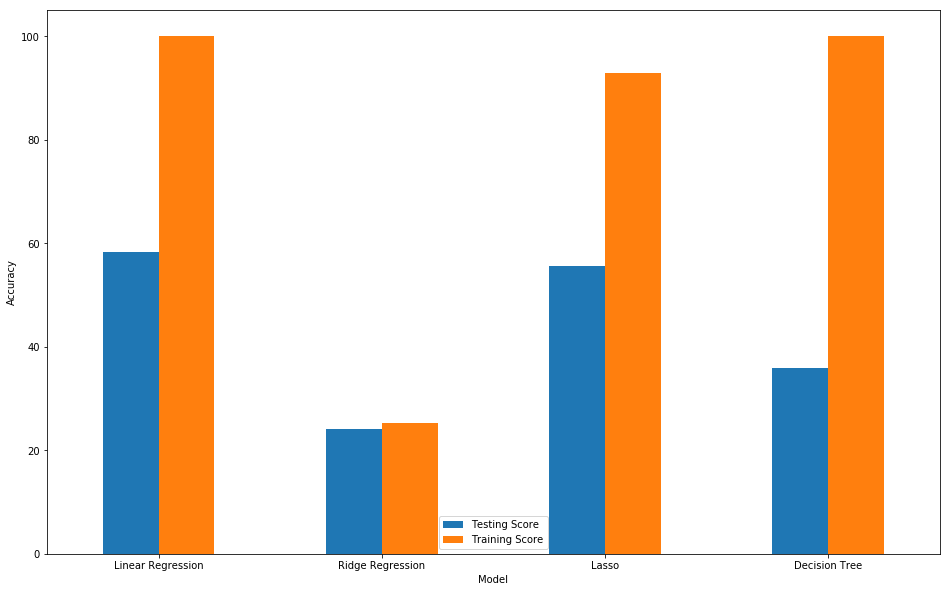

In [28]:
results_table.plot(kind = 'bar', x = 'Model', figsize = (16, 10))
plt.xticks(rotation = 'horizontal')
plt.ylabel('Accuracy')